# Churn rate prediction - part 1 - EDA

Churn is a one of the biggest problem for business. Churn prediction can be utilised to improve retention rate by finding out who is likely to churn in the given period. Basically, the task is to predict whether a customer will stop using the services of the company.



#### dataset
Telco [dataset](https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv) was offered for the Kaggle [competition](https://www.kaggle.com/blastchar/telco-customer-churn).
The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample.

## Download dataset

In [70]:
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [42]:
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
urllib.request.urlretrieve(url, '../data/raw/Telco-Customer-Churn.csv')
data = pd.read_csv("../data/raw/Telco-Customer-Churn.csv")

## Data overview
### Data Clean

In [43]:
print(f"Shape of the dataset: {data.shape}")
data.head(3).append(data.tail(3))

Shape of the dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [44]:
# check null
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
print(f"There are {data.isnull().values.sum()} nulls in the dataset of length {data.shape[0]}")

There are 11 nulls in the dataset of length 7043


In [45]:
# dealing with missing data
data.TotalCharges = data.TotalCharges.fillna(value=np.mean(data.TotalCharges))

### Outliers

In [46]:
data[["MonthlyCharges", "TotalCharges", "tenure"]].dtypes

MonthlyCharges    float64
TotalCharges      float64
tenure              int64
dtype: object

<AxesSubplot:>

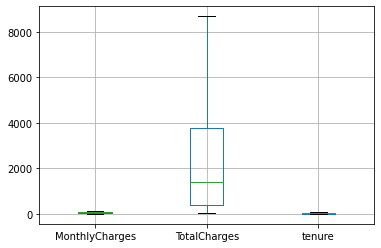

In [47]:
# outliers can markedly affect the models
data[["MonthlyCharges", "TotalCharges", "tenure"]].boxplot()

No extreme autliers which are more extreme than Q1 - 1,5 * IQR or Q3 + 1,5 * IQR

## Target transformation

In [48]:
# transform Yes/No to binary
binary_dict = {'Yes': 1, 'No': 0}

data.loc[:, ["PaperlessBilling", "PhoneService",
             "Dependents" ,"Partner", "Churn"]] = data[["PaperlessBilling", "PhoneService", 
                                                        "Dependents" ,"Partner", "Churn"]].stack().map(binary_dict).unstack()


## Feature exploration
### Categorical features

<AxesSubplot:xlabel='PaymentMethod', ylabel='Churn rate'>

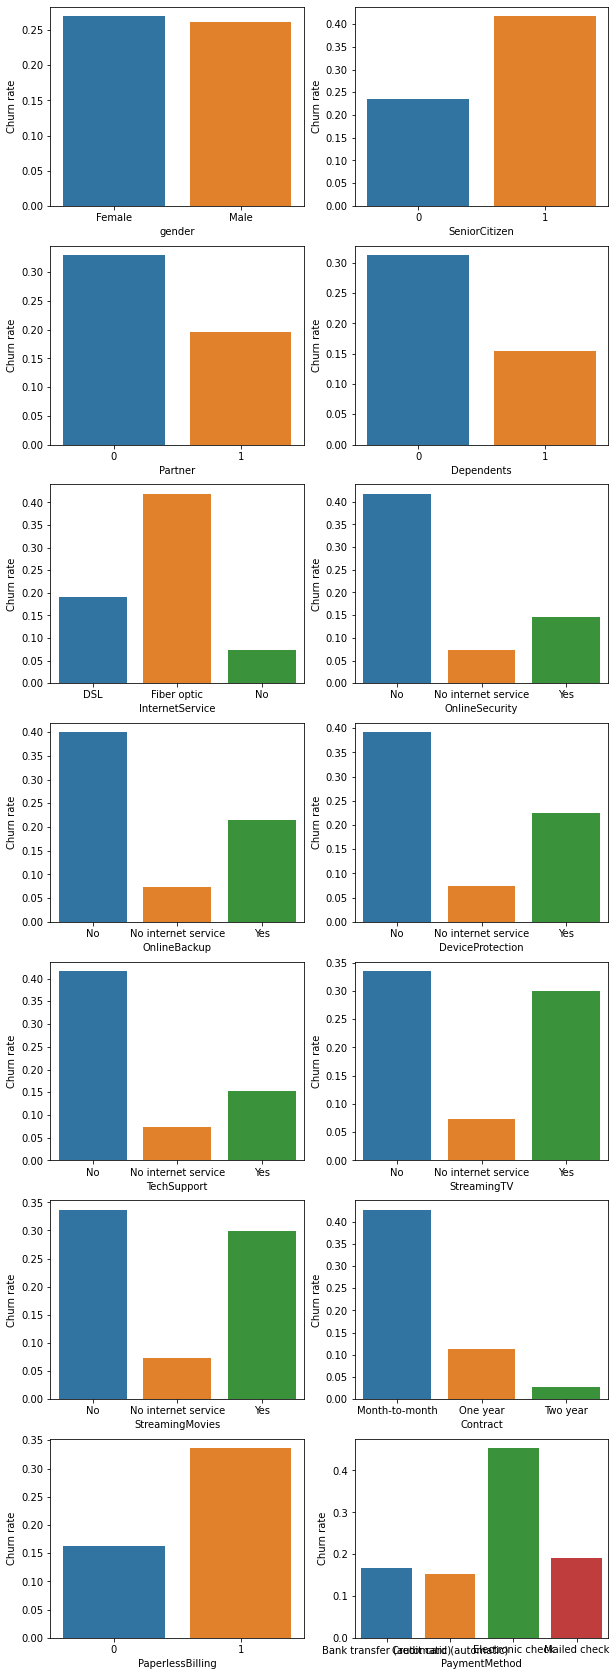

In [50]:
fig, ax = plt.subplots(7,2, figsize=(10,30))
sns.barplot(x = 'gender', y = 'Churn rate', data=data.groupby('gender').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[0, 0])
sns.barplot(x = 'SeniorCitizen', y = 'Churn rate', data=data.groupby('SeniorCitizen').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[0, 1])
sns.barplot(x = 'Partner', y = 'Churn rate', data=data.groupby('Partner').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[1, 0])
sns.barplot(x = 'Dependents', y = 'Churn rate', data=data.groupby('Dependents').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[1, 1])
sns.barplot(x = 'InternetService', y = 'Churn rate', data=data.groupby('InternetService').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[2, 0])
sns.barplot(x = 'OnlineSecurity', y = 'Churn rate', data=data.groupby('OnlineSecurity').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[2, 1])
sns.barplot(x = 'OnlineBackup', y = 'Churn rate', data=data.groupby('OnlineBackup').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[3, 0])
sns.barplot(x = 'DeviceProtection', y = 'Churn rate', data=data.groupby('DeviceProtection').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[3, 1])
sns.barplot(x = 'TechSupport', y = 'Churn rate', data=data.groupby('TechSupport').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[4, 0])
sns.barplot(x = 'StreamingTV', y = 'Churn rate', data=data.groupby('StreamingTV').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[4, 1])
sns.barplot(x = 'StreamingMovies', y = 'Churn rate', data=data.groupby('StreamingMovies').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[5, 0])
sns.barplot(x = 'Contract', y = 'Churn rate', data=data.groupby('Contract').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[5, 1])
sns.barplot(x = 'PaperlessBilling', y = 'Churn rate', data=data.groupby('PaperlessBilling').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[6, 0])
sns.barplot(x = 'PaymentMethod', y = 'Churn rate', data=data.groupby('PaymentMethod').Churn.mean().reset_index().rename(columns={"Churn" : "Churn rate"}), ax=ax[6, 1])


Observations:
* Clients churn does not depend much on gender
* The share of churned clients among Seniors is significantly higher than among non Seniors.
* Clients with a partner are less likely to churn than clients without a partner.
* Clients with dependents tend to stay with the company, others are lakely to churn.
* For clients who have internet connection via fiber optic the risk to churn is significant.
* Clients who have not ordered online security, online backup, device protection, and tech support are likely to churn.
* The Streaming TV and Streaming Movies options for clients does not affect churn a lot.
* Clients sighned the shorter contracts are easy to churn

### Numerical feature exploration
#### Tenure

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

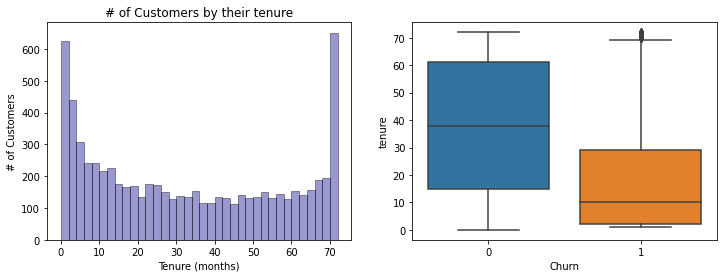

In [77]:
# Number of months the customer has stayed with the company
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4))

sns.distplot(data['tenure'], hist=True, kde=False, bins=int(180/5), color = 'darkblue',
                 hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4}, ax = ax1)
ax1.set_ylabel('# of Customers')
ax1.set_xlabel('Tenure (months)')
ax1.set_title('# of Customers by their tenure')

sns.boxplot(x = data.Churn, y = data.tenure, ax = ax2)

Observations:
* Many customers churn either after the first month having Month-to-month contracts or after 72 months (6 years) having one or two years contracts.
* Non-churning customers tend to stay longer with the company.

#### Charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

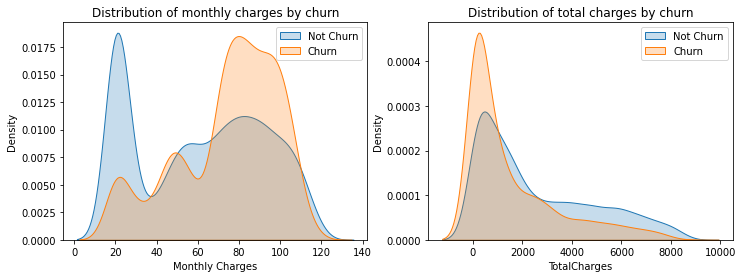

In [81]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4))

sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 0) ], ax = ax1, shade= True)
sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 1) ], ax = ax1, shade= True)
ax1.legend(["Not Churn","Churn"], loc='upper right')
ax1.set_xlabel('Monthly Charges')
ax1.set_title('Distribution of monthly charges by churn')

sns.kdeplot(data.TotalCharges[(data["Churn"] == 0) ], ax = ax2, shade = True)
sns.kdeplot(data.TotalCharges[(data["Churn"] == 1) ], ax = ax2, shade = True)
ax2.legend(["Not Churn","Churn"],loc='upper right')
ax2.set_xlabel('TotalCharges')
ax2.set_title('Distribution of total charges by churn')

Observations:
* More customers churn when the monthly charges are high.
* There is higer churn when the total charges are lower.

## Feature transformation

In [51]:
# transform gender to binary
gender_dict = {'Female': 1, 'Male': 0}

data.loc[:, "gender"] = data.gender.map(gender_dict)

In [55]:
#convert the categorical variables into dummy variables

data = pd.get_dummies(data, columns=['MultipleLines', 'InternetService',
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
      'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])

### Data Statistics

In [56]:
# overall statistics
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,0.265370,0.481329,0.096834,0.421837,0.343746,0.439585,0.216669,0.496663,0.216669,0.286668,0.438450,0.216669,0.344881,0.439443,0.216669,0.343888,0.493114,0.216669,0.290217,0.398978,0.216669,0.384353,0.395428,0.216669,0.387903,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.000258,0.441561,0.499687,0.295752,0.493888,0.474991,0.496372,0.412004,0.500024,0.412004,0.452237,0.496232,0.412004,0.475363,0.496355,0.412004,0.475038,0.499988,0.412004,0.453895,0.489723,0.412004,0.486477,0.488977,0.412004,0.487307,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1400.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

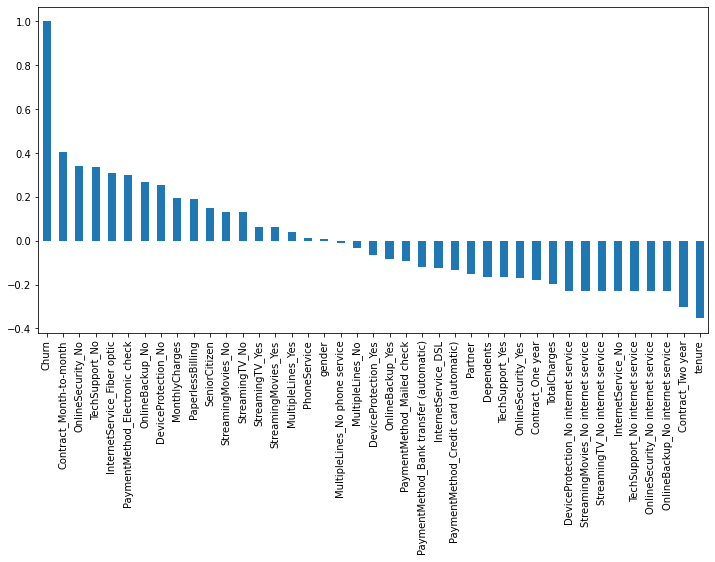

In [61]:
# Correlation of "Churn" with other variables:
plt.figure(figsize=(12,6))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')                                                      

Observations:
* Month-to-month contracts, absence of online security and tech support correlat positively with churn. While, tenure, two year contracts correlat negatively with churn.
